In [111]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


def clean_data(df):
    #Removemos columna Y que es la variable de salida
    df.drop(columns='Y', inplace=True)
    df.dropna(thresh=20, inplace=True)
    df['X10'].fillna(df['X10'].mode())
    df['X3'] = df['X3'].replace([0,5,6],4)
    df.dropna(inplace=True)
    return df

df = pd.read_csv('data\default_of_credit_card_clients.csv', index_col='ID')
df_clean = clean_data(df)
df_clean.columns = ['Given_credit', 'Gender', 'Education', 'Marital_status', 'Age','PP_Sep','PP_Aug','PP_Jul','PP_Jun','PP_May','PP_Apr',
                    'BS_Sep','BS_Aug','BS_Jul','BS_Jun','BS_May','BS_Apr','LP_Sep','LP_Aug','LP_Jul','LP_Jun','LP_May','LP_Apr']

In [112]:
df_clean.head()

,Given_credit,Gender,Education,Marital_status,Age,PP_Sep,PP_Aug,PP_Jul,PP_Jun,PP_May,...,BS_Jul,BS_Jun,BS_May,BS_Apr,LP_Sep,LP_Aug,LP_Jul,LP_Jun,LP_May,LP_Apr
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


Text(0.5, 1.0, 'Correlation Heatmap')

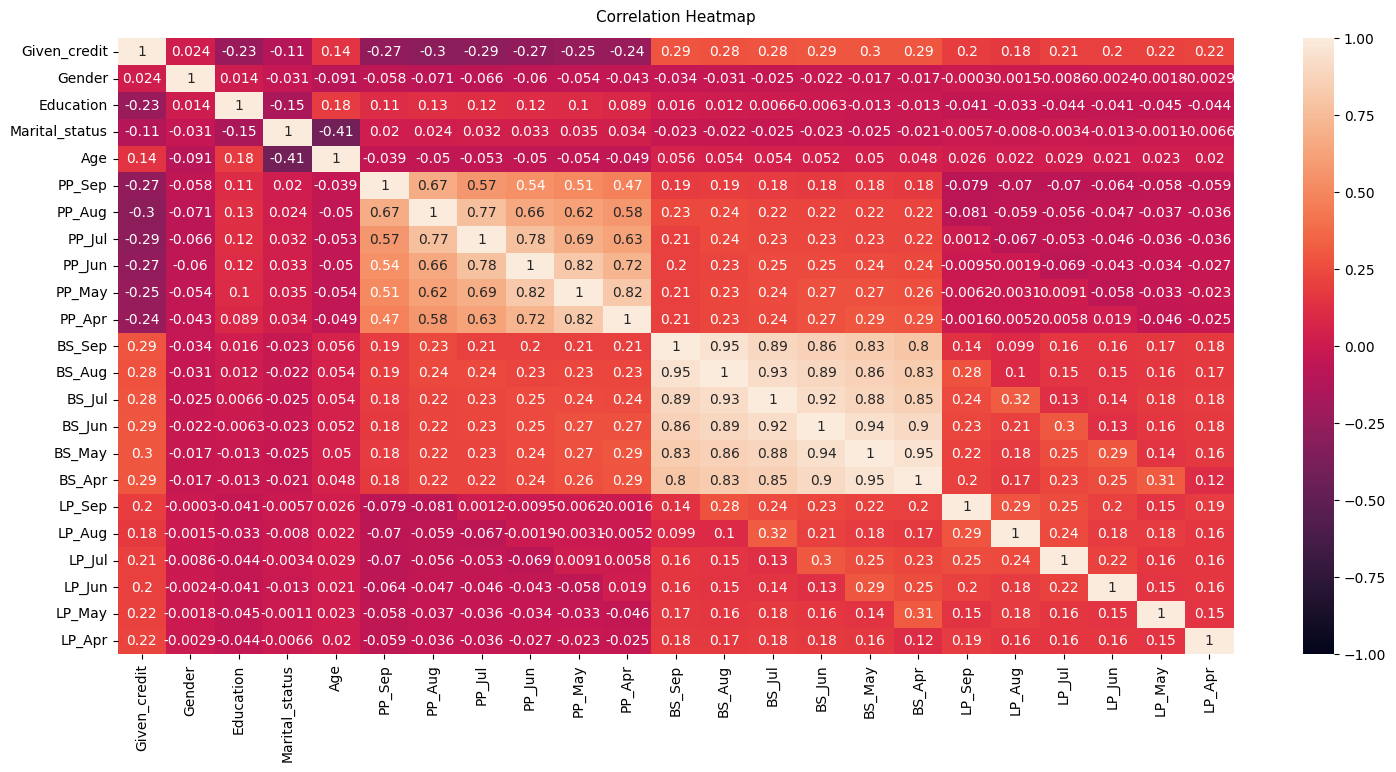

In [113]:
plt.figure(figsize=(18,8))
heatmap = sns.heatmap(df_clean.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':11}, pad=12)

Hay alta correlación en las variables X12 a X17 que son pagos de mes a mes

In [114]:
pca = PCA(n_components=23)

# Aplicamos escalamiento antes de hacer el PCA
pca.fit(preprocessing.scale(df_clean))
pca_summary = pd.DataFrame({'Standard deviation': np.sqrt(pca.explained_variance_), 
                            'Proportion of variance': pca.explained_variance_ratio_,
                            'Cumulative proportion': np.cumsum(pca.explained_variance_ratio_)})
pca_summary.round(4)

,Standard deviation,Proportion of variance,Cumulative proportion
0,2.5581,0.2845,0.2845
1,2.0256,0.1784,0.4629
2,1.2471,0.0676,0.5305
3,1.2145,0.0641,0.5946
4,1.0125,0.0446,0.6392
5,0.9774,0.0415,0.6807
6,0.9510,0.0393,0.7200
7,0.9424,0.0386,0.7587
8,0.9329,0.0378,0.7965
9,0.8848,0.0340,0.8305


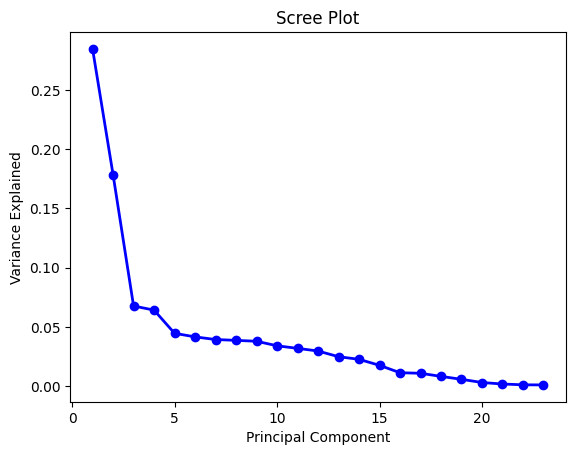

In [154]:
# Scree plot
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

Paso 1.- Necesitamos 13 PC para llegar al 90% de la varianza

In [115]:
pca_summary.iloc[12,2]

0.9168294108797536

Ahora relacionamos los componentes principales con las variables originales

Paso 2.- Aquí podemos revisar rápidamente que el PC1 está compuesto mayorment por los Bill statements, PC2 por los Past payments, PC3 por Edad y Status marital, PC4 igual, PC5 principalmente por Genero, etc.

Text(0.5, 1.0, 'PCs vs Variables originales Heatmap')

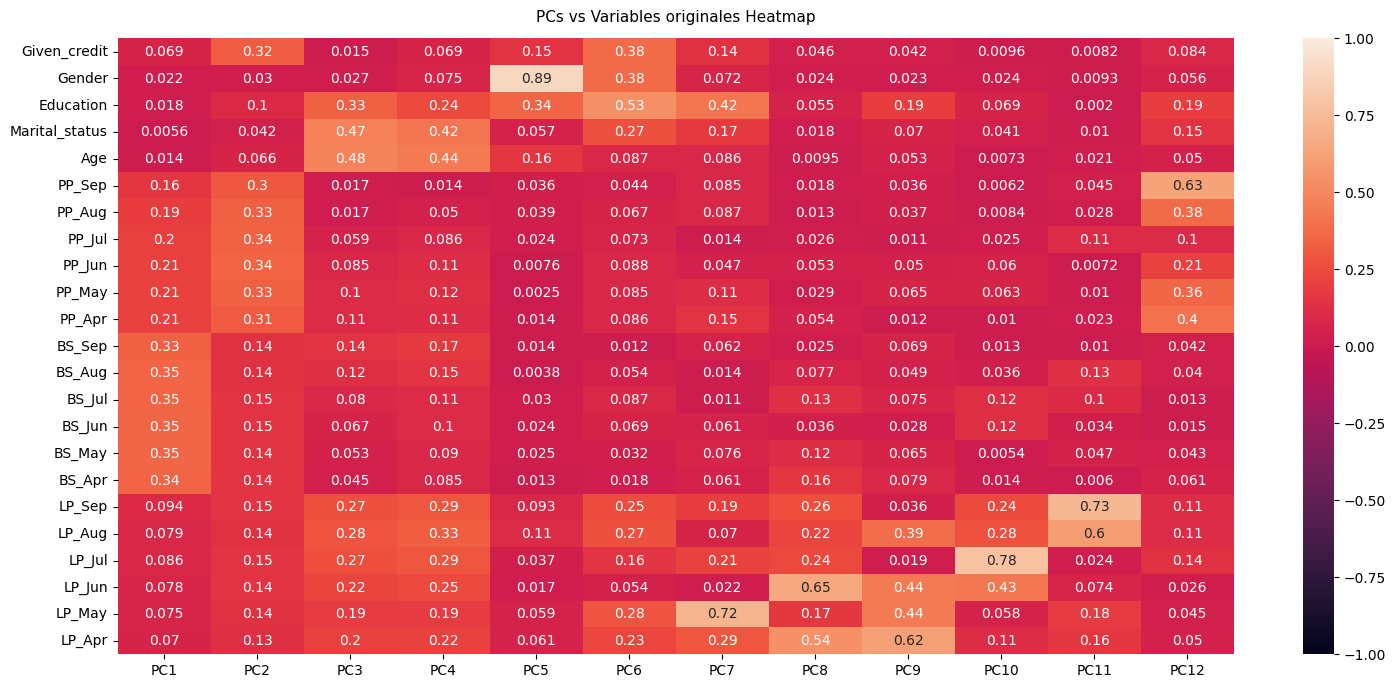

In [142]:
pcaComponents_df = pd.DataFrame(pca.components_.transpose(),
                                columns= ['PC{}'.format(i) for i in range(1, len(pca_summary.index) + 1)],
                                index=df_clean.columns
                                ).abs()

plt.figure(figsize=(18,8))
pca_heatmap = sns.heatmap(pcaComponents_df.iloc[:,:12], vmin=-1, vmax=1, annot=True)
pca_heatmap.set_title('PCs vs Variables originales Heatmap', fontdict={'fontsize':11}, pad=12)


array([0.28449704, 0.17838107, 0.06761303, 0.06412523, 0.044569  ,
       0.04153561, 0.03931913, 0.03861093, 0.03784129, 0.0340337 ,
       0.03185977, 0.02962075, 0.02482284, 0.02260785, 0.01754884,
       0.01129512, 0.01084175, 0.00820972, 0.00573515, 0.00304969,
       0.00177338, 0.00109944, 0.00100965])

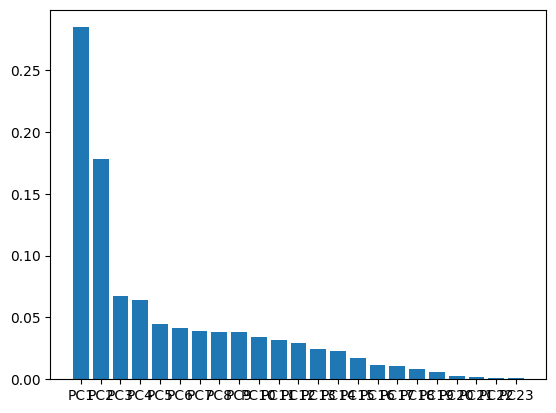

In [153]:
#Variabilidad de cada componente
plt.bar(pcaComponents_df.columns, pca.explained_variance_ratio_)
pca.explained_variance_ratio_

Paso 3.- Identificando valores atípicos

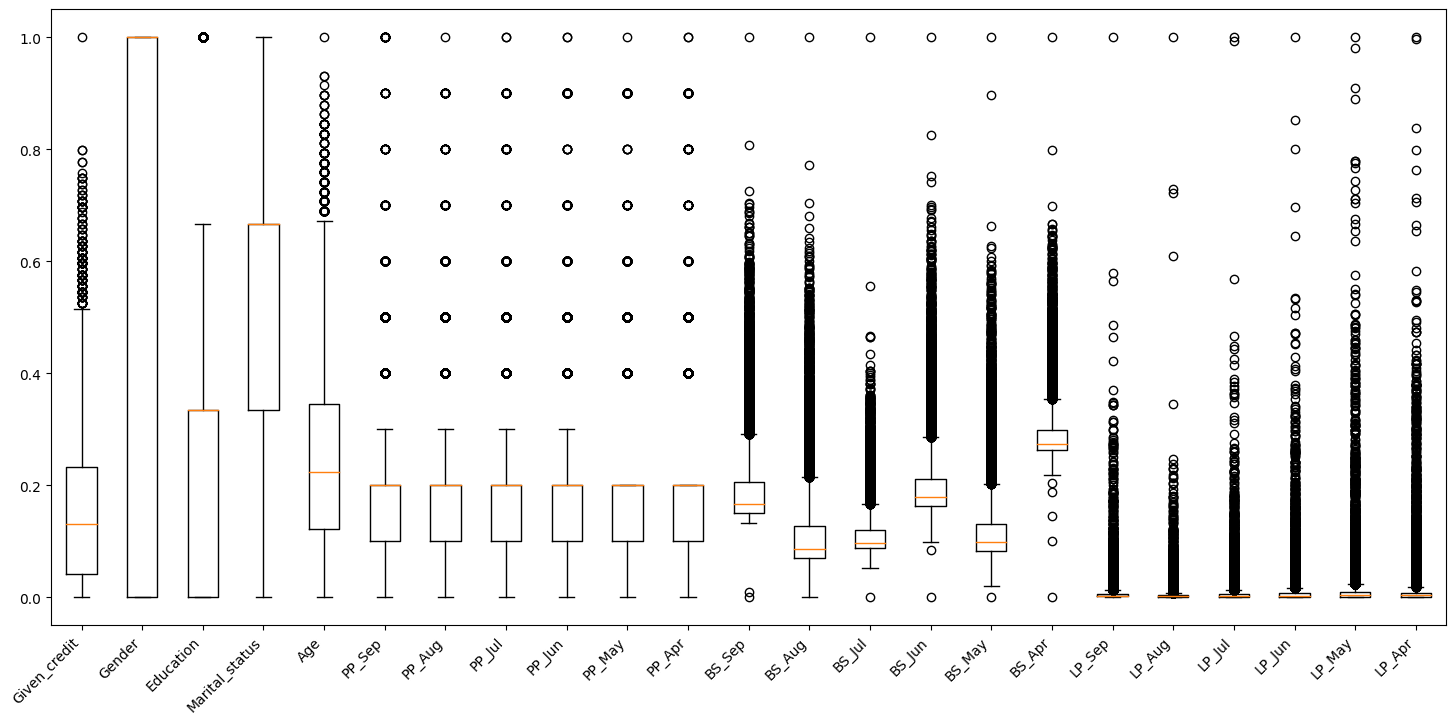

In [138]:
from sklearn.preprocessing import MinMaxScaler


plt.figure(figsize=(18,8))
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_clean)
plt.boxplot(scaled_data, labels= df_clean.columns)
plt.xticks(rotation=45, ha='right')
plt.show()

¿Cuál es el número de componentes mínimo y por qué?
Dependiendo de la varianza objetivo que busquemos mantener, si queremos arriba del 90% serían 13 componentes, si queremos arriba del 80% serian 10 componentes

¿Cuál es la variación de los datos que representan esos componentes?
91.68% con los 13 componentes

¿Cuál es la pérdida de información después de realizar PCA?
Los otros 10 componentes que no se usan, representando el 9% de la varianza aprox.

De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?
En el PC1 todos los Bill Statements tienen una importancia de alrededor del 30% cada uno, y en el PC2 los past payments son los más importantes, después de esos los demás componentes no aportan mucha variabilidad aunque igual deberíamos buscar al menos un 80% de la varianza.

¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?
Cuando tenemos muchas más variables y queremos reducir dimensionalidad o cuando las variables están altamente correlacionadas

Referencias:
Géron, A. (2022). Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow. O'Reilly.